In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
import scipy
from mpl_toolkits.mplot3d import Axes3D
import time, sys
import pylab as pl


#### Esercizio svolto da Stefano Polo

#### Matricola: 940175

#### Informazione sulla cartella contenente codici e risultati:
La struttura della cartella così come è presentata è funzionale per una compilazione semplice del *notebook*. Infatti tutti i risultati della simulazione sono disposti nella cartella <span style="color:red"> Risultati </span>. Di conseguenza al finel della compilazione del *notebook* non è necessario rieseguire le simulazioni. Nella cartella <span style="color:red">Codice</span> sono catalogati tutti i codici C++ della simulazione per la soluzione dell'esercizio. La compilazione e l'esecuzione di quest'ultimi prevede l'automatica sovrascrittura dei file contenenti i risultati su quelli vecchi contenuti nella cartella <span style="color:red"> Risultati</span> (dunque un'esecuzione dei codici non richiede che i nuovi risultati vengano copiati a mano in <span style="color:red"> Risultati</span>).

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 9</span>


### Exercise 09.1

#### Introduzione all'esercizio
Il problema del commesso viaggiatore (*traveling salesman problem*, TSP) prevede una sequenza di $N$ città  $c_1, c_2, \dots, c_N$ distribuite casualmente su un piano $(x,y)$. Il commesso è vincolato a visitare solo una volta ciascuna delle città, partendo da una casa base e ritornando su quest'ultima. L'obiettivo del problema è di ottimizzare la distanza percorsa, trovando la combinazione di città che minimizza la seguente *loss/cost function*: 

$$L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2 \, ,$$
dove $\vec{x}_i = (x_i, y_i)$ è la posizione della i-esima città nel piano.

In questo esercizio voglio risolvere il TSP mediante l'impiego di un algoritmo genetico (GA). I sistemi studiati consistono in $N = 30$ città disposte casualmente:
- su una circonferenza di raggio 1;
- in un quadrato di lato 1.

#### Descrizione della simulazione

Per risolvere questo esercizio ho scritto una classe basata su un algoritmo genetico (contenuto nel file <span style="color:red">Salesman.h</span> e <span style="color:red">Salesman.cpp</span> ) che risolvesse il TSP esposto nella cella precedente. Il codice implementato adotta una rappresentazione 1D del cammino percorso nel tempo dal commesso. Ad esempio la stringa di geni (cromosoma) $\left[0,3,1,2\right]$ indica che il viaggiatore visita la città 0 al tempo 0, poi la 3 al tempo 1 e così via. Dunque nel caso di $N = 30$ città gli alleli dei cromosomi possono assumere i valori: $0,1,2,\dots,29$.

Il costruttore della classe crea una generazione genitoriale a partire da una permutazione di $N-1$ geni (il primo gene e quindi la città di partenza è uguale per tutti). Una volta preparata la prima generazione di $K$ individui, ho proceduto con la generazione casuale delle posizioni $\vec{x}_i$ delle città $c_i$, diponendole su una circonferenza o all'interno di un quadrato. 
Infine ho implementato i principali metodi che caratterizzano un algoritmo genetico che operano ad ogni generazione della *run*:

- ***Loss function* (*Fitness*)** (metodo <span style="color:green">Fitness()</span>): per ciascun cromosoma dell'attuale generazione viene calcolata la quantità $L^{(2)}(\vec{x}_0,\vec{x}_1,\dots, \vec{x}_N) =\sum_{i=0}^{30} |\vec{x}_i-\vec{x}_{i+1}|^2 $ con $i = 30 = 0$ (tale condizione garantische che il commesso torni alla città di partenza). 

- **Selezione** (metodi <span style="color:green">Breeders_selection()</span> e <span style="color:green">Selection()</span> ): questo metodo seleziona appunto la classe "allevatrice" (ossia che sono in grado di fare *crossover*) all'interno della generazione genitrice. L'operazione di selezione si basa sul seguente algoritmo:
   
    1. Viene calcolata la *loss function* di tutta la popolazione;
    2. Seleziono come allevatori 1/4 della popolazione con le distanze più brevi;
    3. Seleziono come allevatori pescando randomicamente tra 1/5 e 1/2 della popolazione con le distanze più brevi;

Infine per fare *crossover* vengono selezionati casualmente due indici che si riferiscono a due cromosomi allevatori.

- **Crossover** (metodo <span style="color:green">Crossover(i, j)</span>): il metodo prevede l'utilizzo di 2 stringhe della generazione genitoriale: cromosoma i e j. In seguito vengono generati casualmente un intervallo di geni di un genitore che verranno mantenuti nel figlio e poi i restanti geni vengono riempiti con quelli dell'altro genitore. Può essere reso più semplice con un esempio. Considero due genitori:
$$\left[1,4,3,5,2\right] \quad \left[1,2,3,4,5\right];$$
costruisco il figlio a partire da un intervallo di geni del primo genitore:
$$\left[\, ,4,3, \, , \, \right];$$
infine inserisco i geni mancanti da parte dell'altro genitore e così ottengo la generazione figlia:
$$\left[1,4,3,2 ,5 \right].$$
Ho impiegato il metodo del *crossover* senza imporre una probabilità come parametro esterno. Infatti ho imposto che, ad ogni generazione, i genitori (scelti con il metodo di selezione) generassero un numero di figli pari al numero di individui della generazione precedente (ho attuato quindi un *Generational GA* dove l'intera popolazione viene rimpiazzata ad ogni iterazione).

- **Mutazione** (metodo <span style="color:green">Mutation($P$)</span>): questo metodo prevede che, una volta creata la generazione figlia tramite *crossover*, possa avvenire una permutazione tra una coppia di geni (quindi città) presenti all'interno dello stesso individuo. Gli individui e i propri geni che subiscono mutazione sono estratti casualmente. La probabilità $P$ che all'interno di una popolazione possa avvenire una mutazione su alcuni individui è fissata come parametro esterno.

Definiti i seguenti metodi è stata lanciata la simulazione con i seguenti parametri (tabella sottostante) per le città disposte su una criconferenza di raggio 1 e in un quadrato di lato 1:

Disposizione |Numero individui per generazione ($K$) | Numero di generazioni | Probabilità di mutazione
-------|--------|--------|--------|--------|----
Circonferenza|$10^3$ |$10^3$|0.015
Quadrato|$10^3$|$10^3$|0.02|

#### Presentazione risultati simulazione
Nelle celle sottostanti presento i grafici della minima distanza quadratica $L^{(2)}$ in funzione del numero di generazioni $N_{gen}$, della distanza quadratica media $\langle L^{(2)}\rangle$ calcolata sul $50 \%$ dei cromosomi migliori della popolazione (con relativa deviazione standard) ad ogni generazione e del miglior percorso all'ultima generazione. Tali risultati sono mostrati sia per 30 città disposte randomicamente su una circonferenza di raggio 1, sia per 30 città distribuite casualmente in un quadrato di raggio 1.

Osservando i grafici si può notare come l'algoritmo sia piuttosto efficente; infatti si ha una convergenza verso la $L^{(2)}$ minima con poche $N_{gen}$. Il percorso che minimizza la distanza per il caso della circonferenza sembra essere il migliore, mentre per il quadrato in alcuni punti si potrebbe scegliere un percorso ancora migliore (ma va bene così perchè è un algoritmo metaeuristico).
Mi sono reso conto che l'algoritmo è particolarmente sensibile ai parametri iniziali: $N$, $N_{gen}$, numero di individui per popolazione e probabilità di mutazione.


Distanza minima quadratica percorsa dal commesso viaggiatore sulla circonferenza:  3.18637


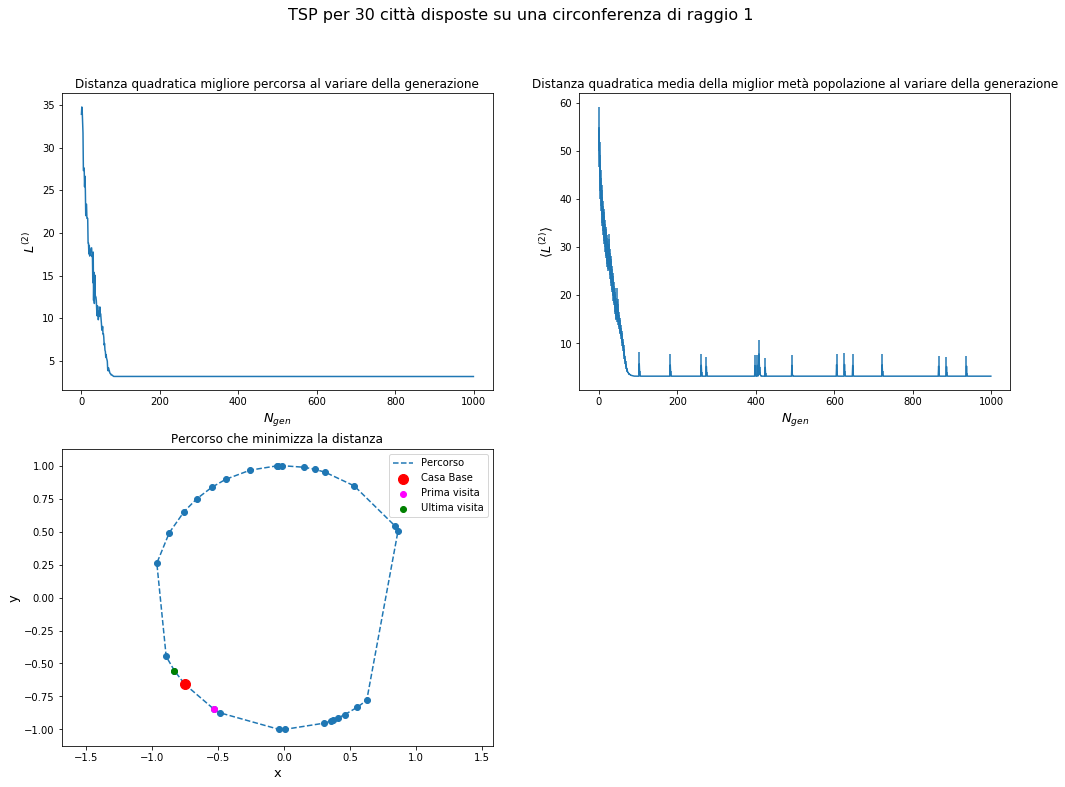

In [2]:
plt.figure(figsize=(17,12))
plt.suptitle('TSP per 30 città disposte su una circonferenza di raggio 1',fontsize=16) 

plt.subplot(2,2,1)
L = np.loadtxt("Risultati/distance_circ.dat", usecols=(0), unpack='true')
plt.plot(L)
plt.title('Distanza quadratica migliore percorsa al variare della generazione')
plt.xlabel(r"$N_{gen}$", fontsize = 13)
plt.ylabel(r"$L^{(2)}$", fontsize = 13)
print('Distanza minima quadratica percorsa dal commesso viaggiatore sulla circonferenza: ', L[len(L)-1])

plt.subplot(2,2,2)
L ,r, y= np.loadtxt("Risultati/distance50_circ.dat", usecols=(0,1,2), unpack='true')
plt.errorbar(L,r,y)
plt.title('Distanza quadratica media della miglior metà popolazione al variare della generazione')
plt.xlabel(r"$N_{gen}$", fontsize = 13)
plt.ylabel(r"$\langle L^{(2)}\rangle$", fontsize = 13)

plt.subplot(2,2,3)
x,y = np.loadtxt("Risultati/path_circ.dat", usecols=(0,1), unpack='true')
plt.plot(x,y,zorder=1,label = 'Percorso',linestyle = '--') 
plt.scatter(x,y,zorder=2)
plt.scatter(x[0],y[0],s=100,label ='Casa Base',color = 'red', zorder = 2)
plt.scatter(x[1],y[1],label ='Prima visita',color = 'Magenta',zorder = 2)
plt.scatter(x[len(x)-2],y[len(y)-2],label ='Ultima visita',color = 'Green',zorder = 2)
plt.title('Percorso che minimizza la distanza')
plt.axis("equal")
plt.xlabel("x", fontsize = 13)
plt.ylabel("y", fontsize = 13)
plt.legend()
plt.show()

Distanza minima quadratica percorsa dal commesso viaggiatore nel quadrato:  1.01714


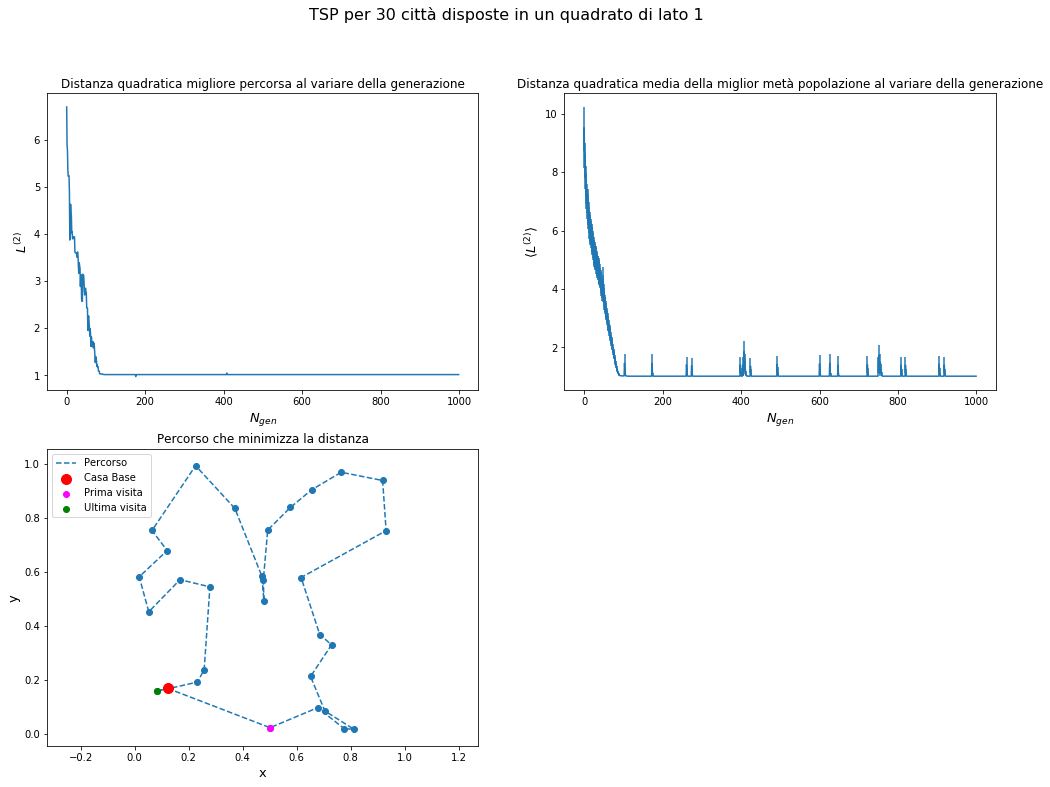

In [3]:
plt.figure(figsize=(17,12))
plt.suptitle('TSP per 30 città disposte in un quadrato di lato 1',fontsize=16) 

plt.subplot(2,2,1)
L = np.loadtxt("Risultati/distance_sq.dat", usecols=(0), unpack='true')
plt.plot(L)
plt.title('Distanza quadratica migliore percorsa al variare della generazione')
plt.xlabel(r"$N_{gen}$", fontsize = 13)
plt.ylabel(r"$L^{(2)}$", fontsize = 13)
print('Distanza minima quadratica percorsa dal commesso viaggiatore nel quadrato: ',L[len(L)-1])

plt.subplot(2,2,2)
L ,r, y= np.loadtxt("Risultati/distance50_sq.dat", usecols=(0,1,2), unpack='true')
plt.errorbar(L,r,y)
plt.title('Distanza quadratica media della miglior metà popolazione al variare della generazione')
plt.xlabel(r"$N_{gen}$", fontsize = 13)
plt.ylabel(r"$\langle L^{(2)}\rangle$", fontsize = 13)

plt.subplot(2,2,3)
x,y = np.loadtxt("Risultati/path_sq.dat", usecols=(0,1), unpack='true')
plt.plot(x,y,zorder=1,label = 'Percorso',linestyle = '--') 
plt.scatter(x,y,zorder=2)
plt.scatter(x[0],y[0],s=100,label ='Casa Base',color = 'red', zorder = 2)
plt.scatter(x[1],y[1],label ='Prima visita',color = 'Magenta',zorder = 2)
plt.scatter(x[len(x)-2],y[len(y)-2],label ='Ultima visita',color = 'Green',zorder = 2)
plt.title('Percorso che minimizza la distanza')
plt.axis("equal")
plt.xlabel("x", fontsize = 13)
plt.ylabel("y", fontsize = 13)
plt.legend()
plt.show()